# Week 8: Regression and Classification

Given the dataset pid, the column label represents the class label of the record. This week, you need
to apply three different classification techniques to predict the label of each record.
1. Split the dataset into training and testing (75/25 %).
2. Train the model using the training data.
3. Use the model to predict the label of the test data.
4. Compute and display the confusion matrix.
5. Evaluate each classifier using two evaluation metrics (e.g. precision and accuracy)
6. In columns C, D, E and F, the value 0 is not correct, remove those values and use one of the data
imputation techniques that you learnt last week to fill the missing values that resulted from
removing the value 0.
7. Use sampling with stratification to split the data such that each class gets represented by a ratio
that reflects the ratio of the records that belong to the class in the dataset.
8. Check the performance of the model after the imputation.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
#Load df
pid = pd.read_csv("pid.csv")
pid.head()

A    B   C   D    E     F      G   H  Label
0  6  148  72  35    0  33.6  0.627  50      1
1  1   85  66  29    0  26.6  0.351  31      0
2  8  183  64   0    0  23.3  0.672  32      1
3  1   89  66  23   94  28.1  0.167  21      0
4  0  137  40  35  168  43.1  2.288  33      1

## Split data X and Y (Train and Test)

In [3]:
X = pid.iloc[:,0:7].values #predictors
y = pid.iloc[:,-1].values #response 

#Split with 25% in test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [4]:
print(len(X_train))
print(len(X_test))

576
192


In [5]:
#Proportion of 1 in train
print("Length of train set %d , number of responses %d, proportion %6.02f" %(len(y_train), y_train.sum(), y_train.sum() / (len(y_train) )))

#Proportion of 1 in test
print("Length of test set %d , number of responses %d, proportion %6.02f" %(len(y_test), y_test.sum(), y_test.sum() / (len(y_test) )))

Length of train set 576 , number of responses 193, proportion   0.34
Length of test set 192 , number of responses 75, proportion   0.39


## Training Models

## Decision Tree



[[96 21]
 [30 45]]


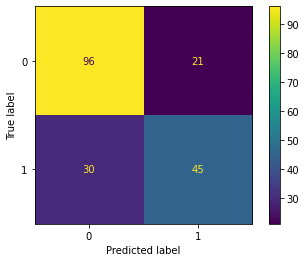

In [6]:

#Fit Model
tree = DecisionTreeClassifier().fit(X_train, y_train)

#Predict Values
y_pred = tree.predict(X_test)

#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Plot non-normalized confusion matrix
plot_confusion_matrix(tree, X_test, y_test)

## Random Forest

[[100  17]
 [ 27  48]]


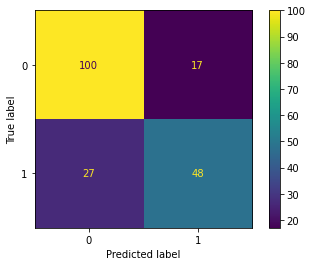

In [7]:

#Fit Model
r_forest = RandomForestClassifier().fit(X_train, y_train)

#Predict Values
y_pred = r_forest.predict(X_test)

#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Plot non-normalized confusion matrix
plot_confusion_matrix(r_forest, X_test, y_test)

In [8]:
#Tunning Random Forest
#clf = RandomForestClassifier(criterion = 'gini', max_leaf_nodes= 8, n_estimators = 100, random_state = 100 )

#from sklearn.model_selection import GridSearchCV
#parameters = [{'criterion': ['gini', 'entropy'],
#               'random_state': [50,70,100,200,250,300,350,400,450,500,550],
#               'n_estimators': [100, 200,250, 300, 350,400,500,1000] , 
#               'max_leaf_nodes': ['None',1,2,3,4,5,6,7,8 ]},
#                  ]
#grid_search = GridSearchCV(estimator = clf,
#                           param_grid = parameters,
#                           scoring = 'accuracy',
#                           cv = 10,
#                           n_jobs = -1)
#grid_search = grid_search.fit(X_train, y_train)
#best_accuracy = grid_search.best_score_
#best_parameters = grid_search.best_params_
#print("Best Accuracy: {:.2f} %".format(best_accuracy*100))

#print("Best Parameters:", best_parameters)

## KNN


[[113  14]
 [ 35  30]]
Model KNeighborsClassifier(n_neighbors=12) Acuracy Score 0.74
Model KNeighborsClassifier(n_neighbors=12) Precision Score 0.68
Scores by each k-fold [0.74025974 0.77922078 0.76623377 0.71428571 0.75324675 0.74025974
 0.75324675 0.80519481 0.69736842 0.78947368]
AVG Accuracy 0.753879015721121


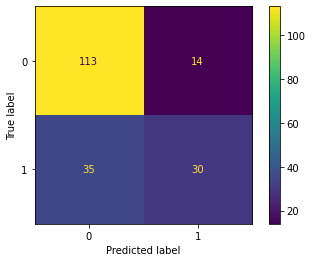

In [112]:
X = pid.iloc[:,0:7].values #predictors
y = pid.iloc[:,-1].values #response 

#feature scalling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#split Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#Fit Model
knn = KNeighborsClassifier(n_neighbors=12).fit(X_train, y_train)

#Predict Values
y_pred = knn.predict(X_test)

#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Plot non-normalized confusion matrix
plot_confusion_matrix(knn, X_test, y_test)

#Accuracy and Precision
print("Model", knn, "Acuracy Score", round(accuracy_score(y_test, y_pred),2))
print("Model", knn,"Precision Score", round(precision_score(y_test, y_pred),2))

#Checking with K-Fold validation (Now we use full dataset)
scores = cross_val_score(knn, X,y, cv=10, scoring="accuracy")
print("Scores by each k-fold", scores)
print("AVG Accuracy", scores.mean())

## SVM

In [10]:
#Parameter Tunning
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))

print("Best Parameters:", best_parameters)

Best Accuracy: 78.12 %
Best Parameters: {'C': 1, 'kernel': 'linear'}


## Logistic Regression

[[107  25]
 [ 16  44]]
Model LogisticRegression(random_state=100) Acuracy Score 0.79
Model LogisticRegression(random_state=100) Precision Score 0.64
Scores by each k-fold [0.72727273 0.77922078 0.79220779 0.71428571 0.75324675 0.76623377
 0.80519481 0.80519481 0.73684211 0.82894737]
AVG Accuracy 0.7708646616541353


C:\Users\hansf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


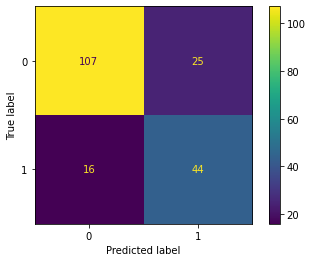

In [11]:
#More Models 
from sklearn.linear_model import LogisticRegression

X = pid.iloc[:,0:7].values #predictors
y = pid.iloc[:,-1].values #response 

clf = LogisticRegression(random_state=100).fit(X_train, y_train)

#feature scalling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#split Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#fit model
clf.fit(X_train,y_train)

#Predict Values
y_pred = clf.predict(X_test)

#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Plot non-normalized confusion matrix
plot_confusion_matrix(clf, X_test, y_test)

#Accuracy and Precision
print("Model", clf, "Acuracy Score", round(accuracy_score(y_test, y_pred),2))
print("Model", clf,"Precision Score", round(precision_score(y_test, y_pred),2))

#Checking with K-Fold validation (Now we use full dataset)
scores = cross_val_score(clf, X,y, cv=10, scoring="accuracy")
print("Scores by each k-fold", scores)
print("AVG Accuracy", scores.mean())

log = clf


In [12]:
#Tunning LogReg
clf = LogisticRegression(random_state=100)



from sklearn.model_selection import GridSearchCV
parameters = [{ 'penalty': ["l1", "l2", "elasticnet", "none"],
               'random_state': [50,70,100,200,250,300,350,400,450,500,550],
               "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"] },
              ]
grid_search = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))

print("Best Parameters:", best_parameters)

log = clf

Best Accuracy: 76.39 %
Best Parameters: {'penalty': 'l2', 'random_state': 50, 'solver': 'newton-cg'}


[[103  29]
 [ 15  45]]
Model GaussianNB() Acuracy Score 0.77
Model GaussianNB() Precision Score 0.61


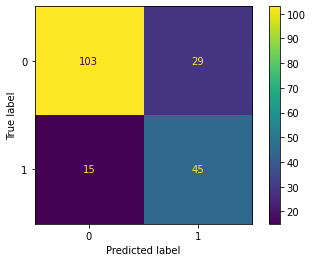

In [13]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(X_train, y_train)

#Predict Values
y_pred = clf.predict(X_test)

#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Plot non-normalized confusion matrix
plot_confusion_matrix(clf, X_test, y_test)

#Accuracy and Precision
print("Model", clf, "Acuracy Score", round(accuracy_score(y_test, y_pred),2))
print("Model", clf,"Precision Score", round(precision_score(y_test, y_pred),2))


## xgboost

[[98 34]
 [17 43]]
Model GradientBoostingClassifier(n_estimators=1000, random_state=0) Acuracy Score 0.73
Model GradientBoostingClassifier(n_estimators=1000, random_state=0) Precision Score 0.56


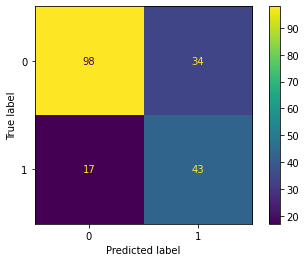

In [14]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier(n_estimators=1000,learning_rate=0.1,random_state=0)
clf.fit(X_train,y_train)


#Predict Values
y_pred = clf.predict(X_test)

#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Plot non-normalized confusion matrix
plot_confusion_matrix(clf, X_test, y_test)

#Accuracy and Precision
print("Model", clf, "Acuracy Score", round(accuracy_score(y_test, y_pred),2))
print("Model", clf,"Precision Score", round(precision_score(y_test, y_pred),2))


## ANN

In [29]:
import tensorflow as tf
import keras

In [113]:
X = pid.iloc[:,0:7].values #predictors
y = pid.iloc[:,-1].values #response 

#feature scalling
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#split Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Initializing the ANN
ann = tf.keras.models.Sequential()

#Adding the input layer
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

#Adding the 2nd hiding layer 
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

#Adding the 3nd hiding layer 
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#Adding the 4th hiding layer 
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

#Adding the 5th hiding layer 
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))


#Adding output layer
#if categorical => activation = 'softmax'
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#ann.add(tf.keras.layers.Dense(units=1, activation='softmax'))

In [114]:
#Compile the ANN
#if categorical => loss = 'categorical_crossentropy'
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the model
ann.fit(X_train, y_train, batch_size = 1, epochs = 150, verbose=0) #put verbose = 1 if u want to see epochs on screen

#Predict the values
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Evaluate the model
confusion_matrix(y_test, y_pred)

#Accuracy
accuracy_score(y_test, y_pred)

0.7395833333333334

In [115]:
#Compile the ANN
#if categorical => loss = 'categorical_crossentropy'
ann.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
#ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the model
ann.fit(X_train, y_train, batch_size = 1, epochs = 150, verbose=0) #put verbose = 1 if u want to see epochs on screen

#Predict the values
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Evaluate the model
confusion_matrix(y_test, y_pred)

#Accuracy
accuracy_score(y_test, y_pred)

0.7291666666666666

In [116]:
#Compile the ANN
#if categorical => loss = 'categorical_crossentropy'
ann.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
#ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fitting the model
ann.fit(X_train, y_train, batch_size = 1, epochs = 150, verbose=0) #put verbose = 1 if u want to see epochs on screen

#Predict the values
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#Evaluate the model
confusion_matrix(y_test, y_pred)

#Accuracy
accuracy_score(y_test, y_pred)

0.7395833333333334

# Evaluating all models considering Acuracy and Precision

## Accuracy = TP + TN / TP + TN + FP + FN
## Precision = TP / TP + FP


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

#Loading all models in a list
models = [tree, r_forest, knn, log]
acc_models = [] #will be use later to compare with diferent slips
prec_models = [] #will be use later to compare with diferent slips
for i in range(0,len(models)):
    clf = models[i]
    clf.fit(X_train, y_train) #fit again the model
    
    y_pred = clf.predict(X_test)
    print("Model", models[i], "Acuracy Score", round(accuracy_score(y_test, y_pred),2))
    print("Model", models[i],"Precision Score", round(precision_score(y_test, y_pred),2))
    acc_models.append(accuracy_score(y_test, y_pred))
    prec_models.append(precision_score(y_test, y_pred))
    print("\n")

Model DecisionTreeClassifier() Acuracy Score 0.67
Model DecisionTreeClassifier() Precision Score 0.48


Model RandomForestClassifier() Acuracy Score 0.78
Model RandomForestClassifier() Precision Score 0.63


Model KNeighborsClassifier(n_neighbors=2) Acuracy Score 0.7
Model KNeighborsClassifier(n_neighbors=2) Precision Score 0.52


Model LogisticRegression(random_state=100) Acuracy Score 0.79
Model LogisticRegression(random_state=100) Precision Score 0.64




# Looking for 0 in columns C,D,E and F

In [16]:
pid = pd.read_csv("pid.csv")
#pid[(pid["C"] == 0) & (pid["D"] == 0) & (pid["E"] == 0) & (pid["F"] == 0)] = np.nan

In [17]:
index = pid[["C", "D", "E", "F"]][(pid["C"]==0)&(pid["D"]==0)&(pid["F"]==0)]
cols = ["C", "D", "E", "F"]

#change just this values in each col to the mean() -> im considering this MCAR
for i in range(0,len(cols)):
    pid.loc[index.index,cols[i]] = pid.loc[:,cols[i]].mean()

In [18]:
pid.loc[index.index] 

A    B          C          D          E          F      G   H  Label
49    7  105  69.105469  20.536458  79.799479  31.992578  0.305  24      0
60    2   84  69.105469  20.536458  79.799479  31.992578  0.304  21      0
81    2   74  69.105469  20.536458  79.799479  31.992578  0.102  22      0
426   0   94  69.105469  20.536458  79.799479  31.992578  0.256  25      0
494   3   80  69.105469  20.536458  79.799479  31.992578  0.174  22      0
522   6  114  69.105469  20.536458  79.799479  31.992578  0.189  26      0
706  10  115  69.105469  20.536458  79.799479  31.992578  0.261  30      1

In [19]:
#Lookfing for distribution of responsae classes
pid["Label"].groupby(pid['Label']).count()

Label
0    500
1    268
Name: Label, dtype: int64

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit

X = pid.iloc[:,0:7].values #predictors
y = pid.iloc[:,-1].values #response 

#Split with 25% in test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [21]:
#Proportion of in train
print("Length of train set %d , number of responses %d, proportion %6.02f" %(len(y_train), y_train.sum(), y_train.sum() / (len(y_train) )))

#Proportion of in test
print("Length of test set %d , number of responses %d, proportion %6.02f" %(len(y_test), y_test.sum(), y_test.sum() / (len(y_test) )))

Length of train set 576 , number of responses 210, proportion   0.36
Length of test set 192 , number of responses 58, proportion   0.30


In [90]:
from sklearn.metrics import accuracy_score

#Loading all models in a list
models = [tree, r_forest, knn, log]
modelsnames = ["DecisionTree", "RandomForest", "KNN", "LogReg"]
acc_models2 = []
prec_models2 = []
for i in range(0,len(models)):
    clf = models[i]
    clf.fit(X_train, y_train) #fit again the model
    
    y_pred = clf.predict(X_test)
    print("Model", models[i], "Acuracy Score", round(accuracy_score(y_test, y_pred),2))
    print("Model", models[i], "Precision Score", round(precision_score(y_test, y_pred),2))
    print("\n")
    acc_models2.append(accuracy_score(y_test, y_pred))
    prec_models2.append(precision_score(y_test, y_pred))

Model DecisionTreeClassifier() Acuracy Score 0.69
Model DecisionTreeClassifier() Precision Score 0.51


Model RandomForestClassifier() Acuracy Score 0.76
Model RandomForestClassifier() Precision Score 0.62


Model KNeighborsClassifier(n_neighbors=12) Acuracy Score 0.79
Model KNeighborsClassifier(n_neighbors=12) Precision Score 0.74


Model LogisticRegression(random_state=100) Acuracy Score 0.78
Model LogisticRegression(random_state=100) Precision Score 0.67




In [91]:
#We improve the acuracy and the precision as well 
df_split = pd.DataFrame(data=[acc_models2,acc_models, prec_models2, prec_models], columns=modelsnames, index=["Accuracy_SameSplit", "Accuracy", "Precision_SameSpli", "Precision"])
df_split

DecisionTree  RandomForest       KNN    LogReg
Accuracy_SameSplit      0.692708      0.755208  0.791667  0.776042
Accuracy                0.671875      0.781250  0.697917  0.786458
Precision_SameSpli      0.514706      0.625000  0.744186  0.666667
Precision               0.480000      0.632353  0.525000  0.637681